**Khalil Mohamed Mouadi**

**Youssef Jehbali**

**Younes Nibgourine**





In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
!pip install pmdarima #une erreur se produit ici mais il faut just clicker le button "Restart Runtime" et réexecuter cette cellule
import pmdarima as pm
import statsmodels.api as sm


plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

R_csv= pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv',index_col='Date')



In [ ]:
data=pd.DataFrame(R_csv['Temp'])
data=data.head(2000)

In [ ]:
train=data[:1800]
test=data[-200:]

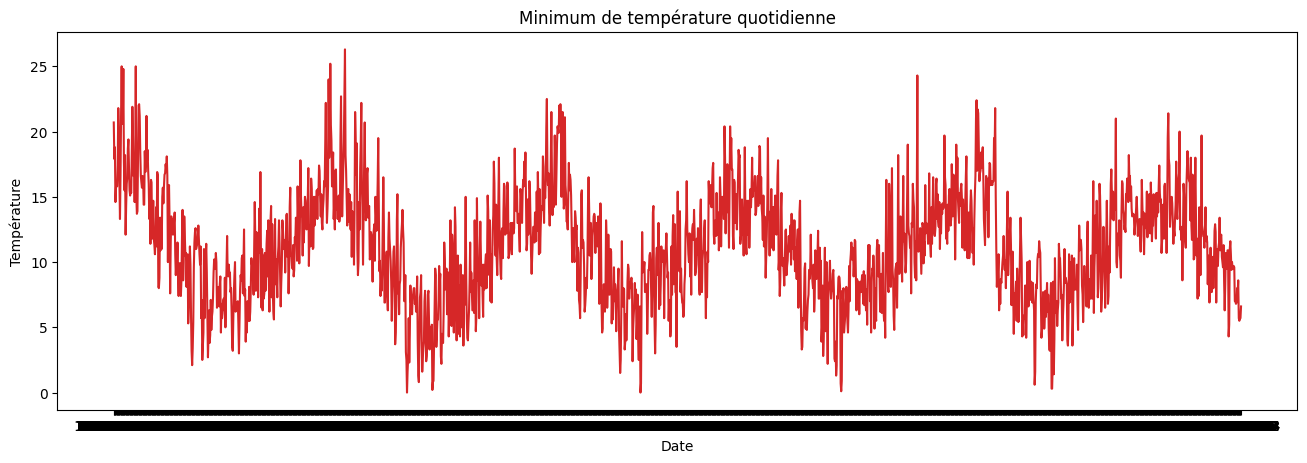

In [ ]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(data.index, data.Temp, color='tab:red')
plt.gca().set(title='Minimum de température quotidienne', xlabel='Date', ylabel='Température')
plt.show()

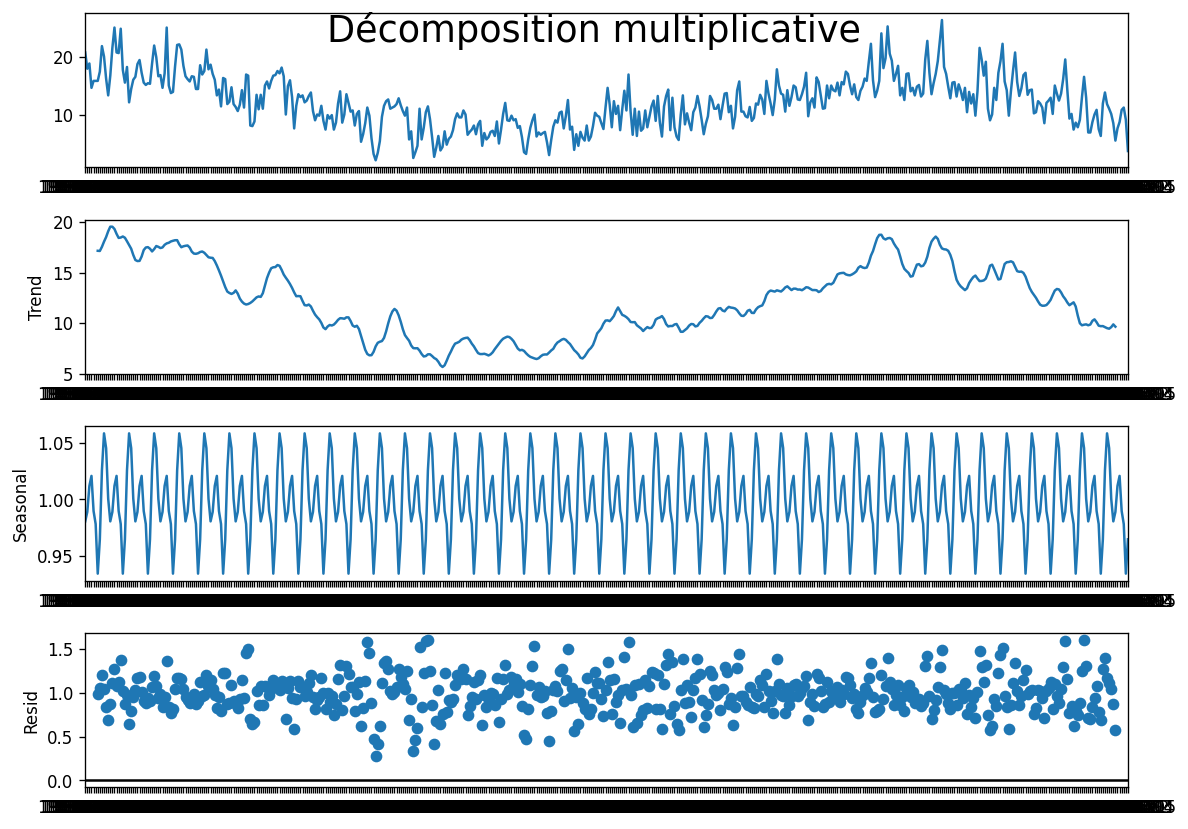

In [ ]:
result_mul = seasonal_decompose(data.head(500), model='multiplicative',period=12)
result_mul.plot().suptitle('Décomposition multiplicative', fontsize=22)
plt.show()

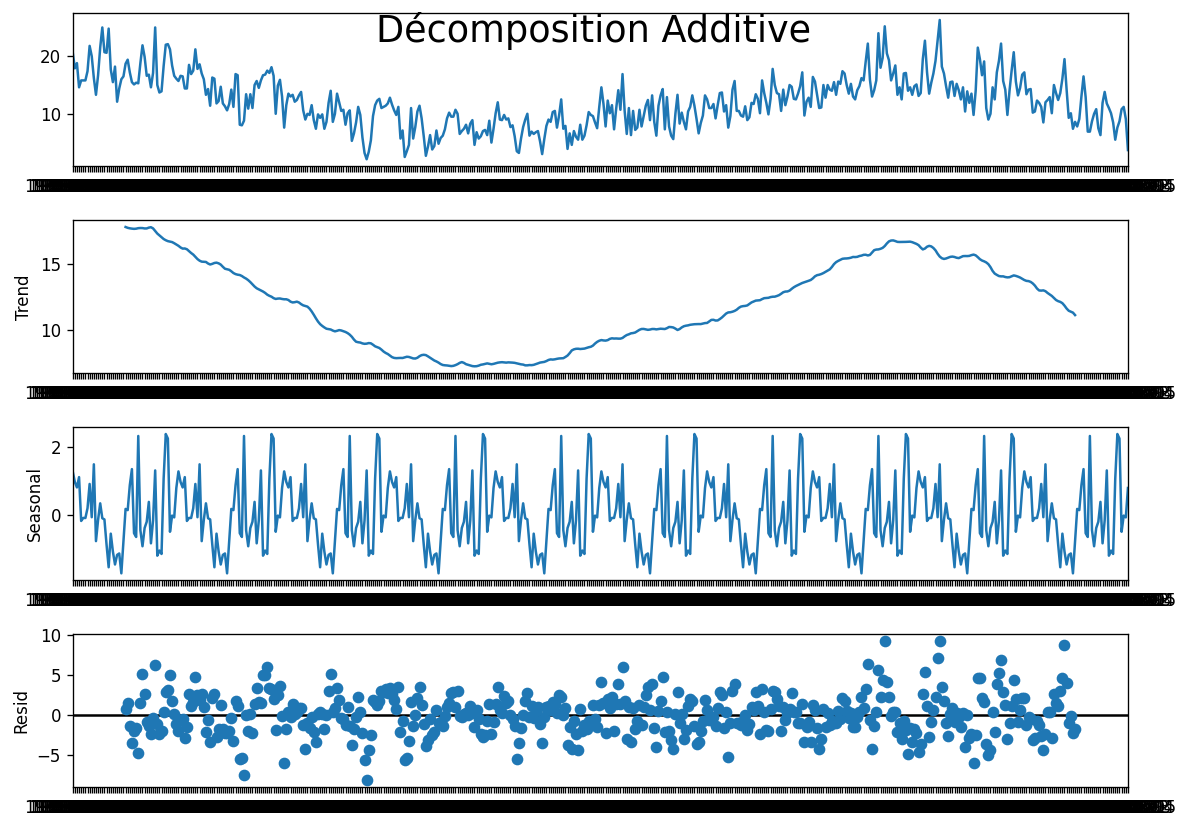

In [ ]:
result_add = seasonal_decompose(data.head(500), model='additive',period=50)
result_add.plot().suptitle('Décomposition Additive', fontsize=22)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


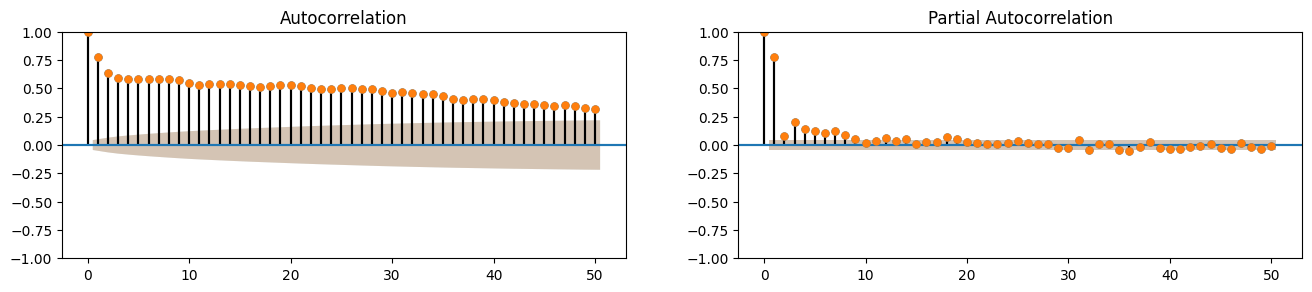

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.Temp.tolist(), lags=50, ax=axes[0])
plot_pacf(data.Temp.tolist(), lags=50, ax=axes[1])

In [ ]:
# ADF Test
result = adfuller(data.Temp.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(data.Temp.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.584358932905572
p-value: 0.006067188908648998
Critial Values:
   1%, -3.4336552971929506
Critial Values:
   5%, -2.8630000946528655
Critial Values:
   10%, -2.5675472932714394

KPSS Statistic: 0.104312
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


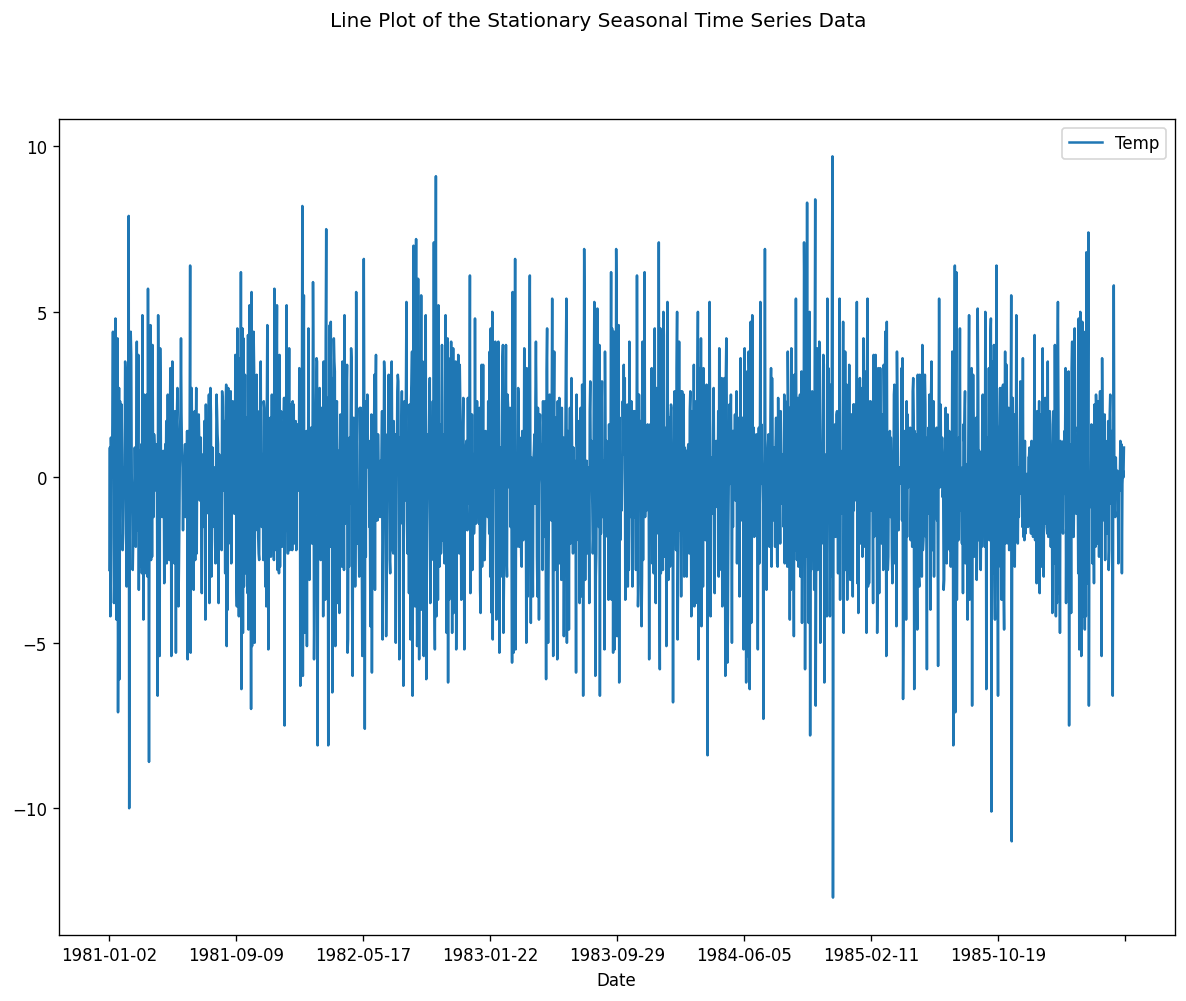

In [ ]:
data_diff = data.diff()
data_diff.dropna(inplace=True)

# Plot de data différencié
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle('Line Plot of the Stationary Seasonal Time Series Data')
data_diff.plot(ax=ax)
plt.show()

In [ ]:
# ADF Test
result = adfuller(data_diff.Temp.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(data_diff.Temp.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -16.064496705625658
p-value: 5.592530254605227e-29
Critial Values:
   1%, -3.433656968706682
Critial Values:
   5%, -2.863000832624789
Critial Values:
   10%, -2.567547686205489

KPSS Statistic: 0.199455
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2016: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


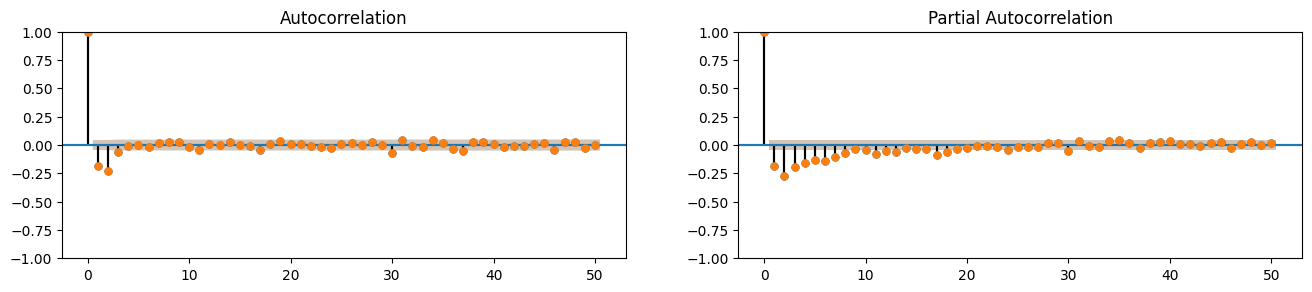

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data_diff.Temp.tolist(), lags=50, ax=axes[0])
plot_pacf(data_diff.Temp.tolist(), lags=50, ax=axes[1])

In [ ]:
model = pm.auto_arima(train.Temp, d=1,
                      m=12, trend='c', seasonal=True, 
                      start_p=0, start_q=0, max_order=6, test='adf',
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8857.414, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8853.427, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8800.025, Time=1.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8697.972, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8853.427, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=8696.901, Time=0.51 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=8698.028, Time=1.37 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=8697.306, Time=4.51 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=8439.050, Time=0.86 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=8441.021, Time=2.90 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=8441.020, Time=4.87 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=8443.020, Time=4.87 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8798.097, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=8411.655, Time=0.85 sec
 ARIMA(2,1,1)(1,0,0

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1800
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -4200.828
Date:                Sat, 15 Jan 2022   AIC                           8411.655
Time:                        18:50:30   BIC                           8439.130
Sample:                             0   HQIC                          8421.797
                               - 1800                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0015      0.006     -0.230      0.818      -0.014       0.011
ar.L1          0.4953      0.025     19.497      0.000       0.446       0.545
ar.L2         -0.1365      0.025     -5.444      0.000      -0.186      -0.087
ma.L1         -0.8941      0.014    -62.904      0.000      -0.922      -0.866
sigma2         6.2446      0.200     31.206      0.000       5.852       6.637
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.62
Prob(Q):                              0.95   Prob(JB):                         0.16
Heteroskedasticity (H):               0.97   Skew:                             0.05
Prob(H) (two-sided):                  0.69   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
sar =sm.tsa.statespace.SARIMAX(train.Temp,order=(2,1,1),seasonal_order=(0,0,0,12))
results = sar.fit()
print("Results of SARIMAX on train")
results.summary().tables[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Results of SARIMAX on train


,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.4953,0.025,19.738,0.000,0.446,0.544
ar.L2,-0.1365,0.025,-5.500,0.000,-0.185,-0.088
ma.L1,-0.8940,0.014,-62.871,0.000,-0.922,-0.866
sigma2,6.2448,0.200,31.213,0.000,5.853,6.637


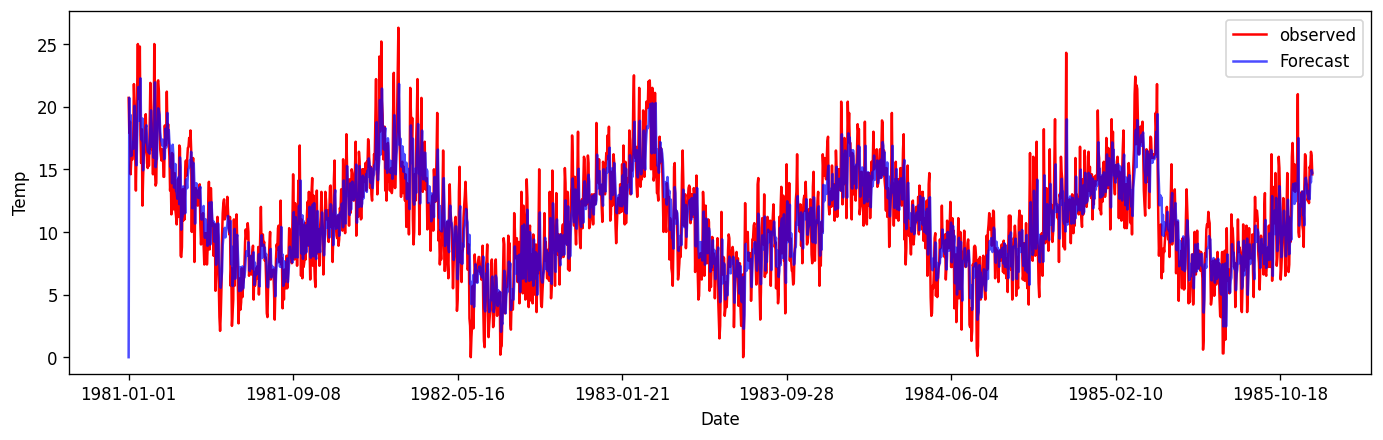

In [ ]:
pred = results.get_prediction(start='1981-01-01', dynamic=False)
pred_ci = pred.conf_int()
ax = train['Temp'].plot(label='observed',color='r')
pred.predicted_mean.plot(ax=ax, label='Forecast',color='b', alpha=.7, figsize=(14, 4))

ax.set_xlabel('Date')
ax.set_ylabel('Temp')
plt.legend()
plt.show()